<a href="https://colab.research.google.com/github/ujjalkumarmaity/Twitter_Sentiment_Analysis/blob/master/Twitter_Sentiment_Analysis_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__What is Sentiment Analysis?__

Sentiment analysis (also known as opinion mining) is one of the many applications of Natural Language Processing. It is a set of methods and techniques used for extracting subjective information from text or speech, such as opinions or attitudes. In simple terms, it involves classifying a piece of text as positive, negative or neutral.


#### Table of contents

1. Load the libraries
1. Load Dataset
1. Tweets Preprocessing and Cleaning
    1. Data Inspection
    1. Data Cleaning
1. Story Generation and Visualization from Tweets
1. Extracting Features from Cleaned Tweets
    1. Bag-of-Words
    1. TF-IDF
    1. Word Embeddings
1. Model Building: Sentiment Analysis
    1. Logistic Regression
    1. Support Vector Machine
    1. RandomForest
    1. XGBoost
1. Model Fine-tuning
1. Summary

# Load the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud
import re
import gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,f1_score

> Load Dataset

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Twitter/train.csv.zip')
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Twitter/test.csv.zip')
df.head(4)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...


>  __<font color='blue'>EDA</font>__

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
print('shape of train dataset',df.shape)
df.label.value_counts()

shape of train dataset (31962, 3)


0    29720
1     2242
Name: label, dtype: int64

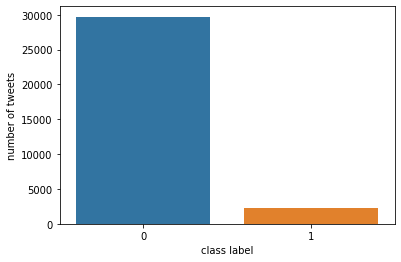

In [ ]:
# 
sns.countplot(df.label,)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

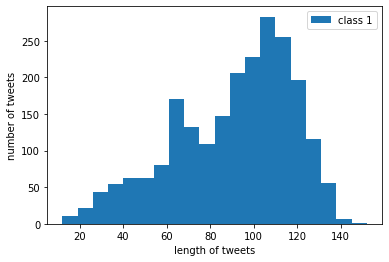

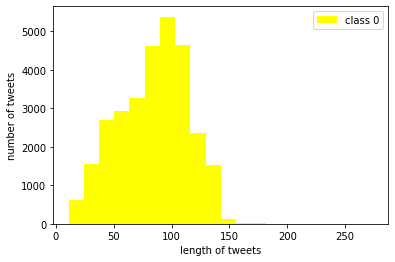

In [ ]:
plt.hist(df[df['label']==1].tweet.str.len(),bins=20,label='class 1')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()
plt.hist(df[df['label']==0].tweet.str.len(),color='yellow',bins=20,label='class 0')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()

>__Data Preprocessing__

##   Preprocessing Tweet Text

1. Removing Twitter Handles (@user)
2. Removing urls from text 
3. Removing Punctuations, Numbers, and Special Characters

5. Convert the word to lowercase
6. Remove Stopwords
7. Stemming the word
8. Lemmatization<br>

After which we collect the words used to describe positive and negative reviews

In [ ]:
text=df['tweet'].values.tolist()
text_test=test['tweet'].values.tolist()
text+=text_test
print(len(text))

49159


In [ ]:
import nltk
nltk.download('all')
stopword=nltk.corpus.stopwords.words('english')
stopword.remove('not')
for index,text_ in enumerate(text):
    text_=re.sub(r'@[\w]*','',text_) #Removing Twitter Handles (@user)
    text_=re.sub(r'http/S+','',text_) #Removing urls from text 
    text_=re.sub(r'[^A-Za-z#]',' ',text_) #Removing Punctuations, Numbers, and Special Characters
    text_=" ".join(i.lower() for i in text_.split() if i.lower() not in stopword) #Removing stopword
    text[index]=text_

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [ ]:
#Stemming the word
pt=PorterStemmer()
wordnet=WordNetLemmatizer()
for index,text_ in enumerate(text):
    text_=" ".join(pt.stem(i) for i in text_.split())
    text_=" ".join(wordnet.lemmatize(i) for i in text_.split())  
    text[index]=text_


In [ ]:
df['preprocess_tweet']=text[:len(df)]
df['length_tweet']=df['preprocess_tweet'].str.len()
test['preprocess_tweet']=text[len(df):]
df.head()

,id,label,tweet,preprocess_tweet,length_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run,46
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit use caus offer wheelchair v...,73
2,3,0,bihday your majesty,bihday majesti,14
3,4,0,#model i love u take with u all the time in ...,#model love u take u time ur,28
4,5,0,factsguide: society now #motivation,factsguid societi #motiv,24


In [ ]:
#Wordcloud

## Featurization

###BOW

In [ ]:
train=df.copy()
train.drop(columns=['id','tweet','preprocess_tweet'],inplace=True)


In [ ]:
bow=CountVectorizer( min_df=2, max_features=1000)
bow.fit(df['preprocess_tweet'])
bow_df=bow.transform(df['preprocess_tweet']).toarray()
print('feature name==',bow.get_feature_names()[:10])
print('number of uniqe words',bow_df.shape[1])
print('shape',bow_df.shape)
bow_train=pd.DataFrame(bow_df)
bow_train['length_tweet']=df['length_tweet']
bow_train['label']=df['label']
bow_train.head()

feature name== ['abl', 'absolut', 'accept', 'account', 'act', 'action', 'actor', 'actual', 'ad', 'adapt']
number of uniqe words 1000
shape (31962, 1000)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,length_tweet,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0


### TF-IDF Features (Bi-Grams)

In [ ]:
tfidf=TfidfVectorizer(ngram_range=(1, 2),min_df=2,max_features=1000)
tfidf.fit(df['preprocess_tweet'])
tfidf_df=tfidf.transform(df['preprocess_tweet']).toarray()
print('number of uniqe words',bow_df.shape[1])
print('shape',tfidf_df.shape)
tfidf_train=pd.DataFrame(tfidf_df)
tfidf_train['length_tweet']=df['length_tweet']
tfidf_train['label']=df['label']
tfidf_train.head()

number of uniqe words 1000
shape (31962, 1000)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,length_tweet,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0


###Word2vec
__size:__ The number of dimensions of the embeddings and the default is 100.

__window:__ The maximum distance between a target word and words around the target word. The default window is 5.

__min_count:__ The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

__workers:__ The number of partitions during training and the default workers is 3.

__sg:__ The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [ ]:
tokenize=df['preprocess_tweet'].apply(lambda x: x.split())
w2vec_model=gensim.models.Word2Vec(tokenize,min_count = 1, size = 100, window = 5, sg = 1)
w2vec_model.train(tokenize,total_examples= len(df['preprocess_tweet']),epochs=20)

(4813846, 5011220)

In [ ]:
w2vec_model.most_similar('father')

[('dad', 0.81424880027771),
 ('#fathersday', 0.7719343900680542),
 ('#father', 0.7619481086730957),
 ('#dad', 0.7502834796905518),
 ('fathersday', 0.7239155769348145),
 ('papa', 0.7110806107521057),
 ('#clapton', 0.690198540687561),
 ('#daddi', 0.6817583441734314),
 ('#hackney', 0.68011474609375),
 ('hrithik', 0.6729472875595093)]

In [ ]:
w2v_words = list(w2vec_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  36842
sample words  ['father', 'dysfunct', 'selfish', 'drag', 'kid', '#run', 'thank', '#lyft', 'credit', 'use', 'caus', 'offer', 'wheelchair', 'van', 'pdx', '#disapoint', '#getthank', 'bihday', 'majesti', '#model', 'love', 'u', 'take', 'time', 'ur', 'factsguid', 'societi', '#motiv', 'huge', 'fan', 'fare', 'big', 'talk', 'leav', 'chao', 'pay', 'disput', 'get', '#allshowandnogo', 'camp', 'tomorrow', 'danni', 'next', 'school', 'year', 'exam', 'think', '#school', '#exam', '#hate']


In [ ]:
vector=[]
from tqdm import tqdm
for sent in tqdm(tokenize):
  sent_vec=np.zeros(100)
  count =0
  for word in sent: 
    if word in w2v_words:
      vec = w2vec_model.wv[word]
      sent_vec += vec 
      count += 1
  if cnt_words != 0:
    sent_vec /= count #normalize
  vector.append(sent_vec)
print(len(vector))
print(len(vector[0]))        

100%|██████████| 31962/31962 [00:38<00:00, 832.87it/s]

31962
100


In [69]:
#example
l='father dysfunct selfish drag kid dysfunct'
count=0
vcc=np.zeros(100)
for word in l:
  if word in w2v_words:
    v=w2vec_model.wv[word]
    vcc+=v
    count+=1
vcc

array([ -3.60652984,   3.99797319,  15.09710191,   7.78470594,
        -6.60517878,   1.54750395,  -8.85273749, -17.99051563,
         0.7840093 ,  -6.06304755, -10.46705624,   1.13577782,
         2.14504385,   0.82606684,  10.43400089,   5.55894366,
         0.20951232,  -4.23087658,  -0.47837945,   0.06943255,
         0.10797098,  -7.07254513,   4.74765222,   4.80401069,
        11.19974926, -14.16314419,  -6.35638078,   0.89576606,
        -1.00856045, -10.86268809,  -4.34017804,   7.32634511,
        -0.48434127,   5.1822983 ,  -1.9151407 , -13.50101671,
         5.15438439,   4.93654279,   7.17853871,   9.3618553 ,
        15.44293129,  10.46210692,  -1.64866135,   2.46998888,
         4.08990073,   0.86400915, -10.84034478,  -8.08441962,
         9.84096526,  -6.93507624,   9.33971676,  -6.47978449,
        -7.20025294,  -3.3869881 ,   7.8633585 , -16.93588882,
        -0.91118276,   7.77634728,  -8.39944649,  -4.4428001 ,
        -6.02361812,   4.22828611,   8.54138002,   3.85

In [70]:

print('number of uniqe words',len(vector[1]))
w2v_train=pd.DataFrame(vector)
w2v_train['length_tweet']=df['length_tweet']
w2v_train['label']=df['label']
w2v_train.head()

number of uniqe words 100


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,length_tweet,label
0,-0.076617,-0.125128,0.431068,0.760425,0.160296,-0.370582,0.011782,-0.104599,0.132124,0.130120,-0.039590,-0.204776,0.307818,0.123330,0.009618,0.099429,-0.087322,-0.381329,-0.063048,-0.587241,-0.111756,-0.286110,0.139137,-0.160226,0.091588,0.003310,0.129326,-0.009158,-0.314273,-0.190797,-0.327745,0.344787,-0.268720,0.189238,0.413757,-0.092741,0.360468,0.360132,0.001020,0.106505,...,0.031176,0.145347,-0.371989,0.306099,-0.153635,-0.002589,0.695623,0.056189,-0.077215,0.441429,-0.257737,0.312041,-0.512100,-0.571816,-0.334655,0.113426,0.125939,0.228523,-0.333520,-0.019441,0.285801,0.129404,-0.138378,-0.252301,-0.012849,-0.102404,-0.184367,-0.100228,0.256816,0.219835,-0.116423,-0.062010,-0.212049,-0.124596,-0.348097,-0.205240,0.014198,0.263467,46,0
1,-0.104599,-0.366017,0.346612,0.500626,-0.140560,-0.107398,-0.223521,-0.314909,0.158419,0.087457,-0.120780,0.076382,0.215192,0.250710,0.169436,0.130622,0.028028,-0.405073,-0.127252,0.073583,-0.025201,-0.147730,0.148986,0.259954,0.344366,0.029733,-0.153498,-0.280452,-0.034237,-0.346598,-0.210200,0.164610,-0.155065,0.145238,0.438193,0.097470,0.262253,0.169701,0.308173,-0.100168,...,-0.089254,0.145272,-0.161986,0.387858,-0.185823,0.022218,0.467358,-0.178896,0.110724,0.243441,0.014849,0.120880,-0.058013,-0.166632,0.000606,0.252478,0.264857,0.275121,-0.224584,0.199406,0.248365,-0.088429,0.186971,0.146287,0.025290,0.085690,-0.085389,-0.228519,0.091489,0.005416,0.076337,-0.169126,-0.051291,-0.190161,-0.248209,0.001089,-0.370979,0.319871,73,0
2,0.500125,0.261814,0.855184,0.054811,0.368882,0.373112,-0.319207,-0.114611,0.489198,-0.184360,-1.069045,0.439453,0.227701,0.015214,0.777066,0.548369,-0.447525,0.008347,-0.799748,-0.167649,0.201977,-0.294515,-0.705418,0.377385,0.288993,0.630681,-0.045890,-0.319276,-0.097742,-0.190507,-1.066075,0.262159,-0.288322,0.031369,0.731600,0.103066,0.168626,0.194419,-0.510948,0.245724,...,-0.136765,0.008371,-1.130715,-0.607848,0.277088,0.409827,1.294571,-0.190039,-0.076701,-0.064582,-0.103568,-0.075706,0.252532,0.567744,-0.023664,0.204881,0.861500,-0.113024,-0.881233,0.240505,-0.117498,0.061928,-0.561501,-0.698446,-0.226114,0.211872,-0.741006,-0.701548,-0.157300,-0.103453,-0.346235,0.049037,-0.963789,-0.282285,-0.704583,-0.659190,0.305220,0.368002,14,0
3,0.035772,-0.038946,0.612428,0.799321,-0.564463,0.269213,-0.423906,-0.404687,0.370106,-0.198604,0.092120,0.172528,-0.018101,-0.183161,0.286565,0.720806,0.200407,-0.493568,0.243078,0.618547,0.129223,-0.393448,0.116021,0.342021,0.567772,0.089087,0.010716,-0.167649,-0.045349,-0.090533,-0.400776,-0.178091,0.101178,0.946983,0.261737,-0.021142,0.735513,0.303553,0.260763,0.462730,...,0.170921,-0.092412,0.771370,0.408568,-0.096636,0.370734,0.839210,-0.551464,-0.152802,0.114300,-0.509291,0.486491,-0.491453,0.390226,0.035740,0.399147,0.413176,-0.216341,0.154037,0.222857,0.754682,0.015966,-0.731878,-0.141914,-0.172137,-0.114162,-0.135369,-0.374784,0.261386,0.077867,0.373327,0.335078,-0.464055,-0.332043,-0.207337,-0.440003,0.539339,0.084958,28,0
4,-0.465424,-0.633823,0.626336,0.748912,0.020588,-0.108554,-0.141693,-0.370339,0.262508,-0.391114,0.205296,-0.014125,0.512615,-0.480690,0.023368,0.469447,0.573245,-0.474189,-0.053832,-0.241436,-0.148171,-0.376123,-0.120440,-0.156886,0.200361,-0.001261,-0.068824,-0.067639,-0.011035,-0.709950,0.016845,0.622864,0.441080,-0.680751,0.637370,-0.444389,0.416469,0.820911,0.415576,-0.229329,...,-0.141318,-0.345527,-0.382877,0.589542,-0.059988,0.425172,0.262212,-0.340384,-0.404468,0.289186,-0.556201,0.272154,0.355060,-0.185426,0.108250,0.413621,0.478132,0.292009,-0.874032,-0.024992,-0.047140,0.215807,-0.146795,-0.054885,0.349586,-0.250784,-0.027528,-0.205602,0.867010,0.097901,0.358492,0.102352,-0.114054,-0.026145,-0.536449,0.448991,-0.462647,0.249321,24,

#Resample

##Upsampling BOW

shape (59440, 1002)


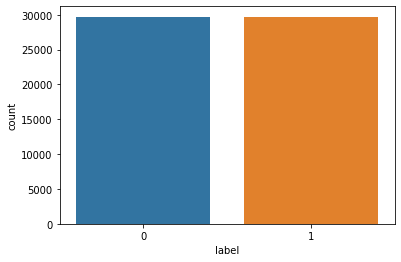

In [76]:
major_class_0,major_class_1=bow_train.label.value_counts()
df_major=bow_train[bow_train['label']==0]
df_minor=bow_train[bow_train['label']==1]
df_minor_upsampled = resample(df_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=major_class_0)
df_bow_upsampled = pd.concat([df_major, df_minor_upsampled])
print('shape',df_bow_upsampled.shape)
sns.countplot(df_bow_upsampled.label)

##Upsampling TF-IDF

shape (59440, 1002)


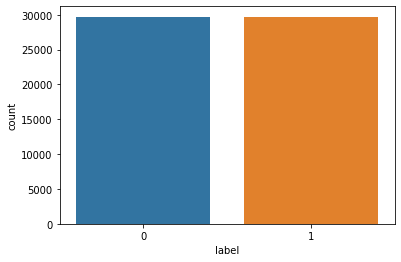

In [77]:
major_class_0,major_class_1=tfidf_train.label.value_counts()
df_major=tfidf_train[tfidf_train['label']==0]
df_minor=tfidf_train[tfidf_train['label']==1]
df_minor_upsampled = resample(df_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=major_class_0)
df_tfidf_upsampled = pd.concat([df_major, df_minor_upsampled])
print('shape',df_tfidf_upsampled.shape)
sns.countplot(df_tfidf_upsampled.label)

##Upsampling  word2vec

shape (59440, 102)


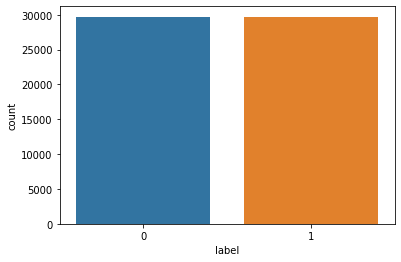

In [78]:
major_class_0,major_class_1=w2v_train.label.value_counts()
df_major=w2v_train[w2v_train['label']==0]
df_minor=w2v_train[w2v_train['label']==1]
df_minor_upsampled = resample(df_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=major_class_0)
df_w2v_upsampled = pd.concat([df_major, df_minor_upsampled])
print('shape',df_w2v_upsampled.shape)
sns.countplot(df_w2v_upsampled.label)

# Split Dataset

In [79]:
x=df_bow_upsampled.iloc[:,0:-1]
y=df_bow_upsampled['label']
x_train_bow,x_test_bow,y_train_bow,y_test_bow=train_test_split(x,y,test_size=0.2)

In [80]:
x=df_tfidf_upsampled.iloc[:,0:-1]
y=df_tfidf_upsampled['label']
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf=train_test_split(x,y,test_size=0.2)

In [81]:
x=df_w2v_upsampled.iloc[:,0:-1]
y=df_w2v_upsampled['label']
x_train_w2v,x_test_w2v,y_train_w2v,y_test_w2v=train_test_split(x,y,test_size=0.2)

#Model Selection

In [118]:
def f1_score_(y_proba,y_test):
  proba = y_proba[:,1] >= 0.3
  proba = proba.astype(np.int) 
  return f1_score( proba,y_test)   


##KNN

In [119]:
from sklearn.neighbors import KNeighborsClassifier
k=[3,5,7,11]
accuracy=[]
for i in tqdm(k):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train_bow,y_train_bow)
  y_pred=model.predict(x_test_bow)
  acc=accuracy_score(y_pred,y_test_bow)
  print('for k=',i,'Accuracy Score',acc)
  accuracy.append(acc)
  y_proba=model.predict_proba(x_test_bow)
  f1_scor=f1_score_(y_proba,y_test_bow)
  print('for k=',i,'f1 score ',f1_scor)



  0%|          | 0/4 [00:00<?, ?it/s]

for k= 3 Accuracy Score 0.8640646029609691




 25%|██▌       | 1/4 [01:55<05:45, 115.08s/it]

for k= 3 f1 score  0.8392173543173117
for k= 5 Accuracy Score 0.8391655450874832




 50%|█████     | 2/4 [03:59<03:55, 117.81s/it]

for k= 5 f1 score  0.8285034299314012
for k= 7 Accuracy Score 0.8194818304172274




 75%|███████▌  | 3/4 [06:13<02:02, 122.88s/it]

for k= 7 f1 score  0.8160220994475139
for k= 11 Accuracy Score 0.7879374158815612




100%|██████████| 4/4 [08:43<00:00, 130.89s/it]

for k= 11 f1 score  0.7749410840534171


##Naieve Bayes

In [97]:
#from sklearn.
y_proba=model.predict_proba(x_test_bow)

In [96]:
f1_score_(y_proba,y_test_bow)

ValueError: ignored

In [117]:
p=y_proba[:,1]>0.3
prediction_int = p.astype(np.int) 
prediction_int
f1_score(prediction_int,y_test_bow)

0.8392173543173117

In [108]:
y_test_bow.values
f1_score(prediction_int,y_test_bow.values)

IndexError: ignored

In [112]:
p=y_test_bow.values
p.shape

(11888,)

In [114]:
x_train_bow.shape

(47552, 1001)

In [115]:
df.shape

(31962, 5)

In [ ]:
prediction = model.predict_proba(x_test)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 

f1_score(y_test, prediction_int) 

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy score',accuracy_score(y_pred,y_test))


In [ ]:
y_proba=model.predict_proba(x_test)
y_proba=y_proba[:,1] >= 0.3
y_proba = y_proba.astype(np.int) 
print(y_proba)
print('f1 Score',f1_score(y_proba,y_test))